In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#--weights /data/vgenty/__data__/snapshot_rmsprop_nu_alex_iter_584.caffemodel.h5

In [2]:
%run -i ./tools/train_net.py --gpu 2  --solver models/rpn_uboone/alex_nu/faster_rcnn_end2end/solver.prototxt --imdb rpn_uboone_train_1 --iters 700000 --cfg experiments/cfgs/faster_rcnn_end2end_NU.yml

Called with args:
Namespace(cfg_file='experiments/cfgs/faster_rcnn_end2end_NU.yml', gpu_id=2, imdb_name='rpn_uboone_train_1', max_iters=700000, pretrained_model=None, randomize=False, set_cfgs=None, solver='models/rpn_uboone/alex_nu/faster_rcnn_end2end/solver.prototxt')
Using config:
{'DATA_DIR': '/home/vgenty/py-faster-rcnn/data',
 'DEBUG': False,
 'DEDUP_BOXES': 0.0625,
 'DEVKIT': 'Singlesdevkit3',
 'EPS': 1e-14,
 'EXP_DIR': 'faster_rcnn_end2end',
 'GPU_ID': 2,
 'IMAGE2DPROD': 'train',
 'IMAGE_LOADER': 'MergedLoader',
 'MATLAB': 'matlab',
 'MODELS_DIR': '/share/vgenty/py-faster-rcnn/models/rpn_uboone',
 'PIXEL_MEANS': array([[[ 0.,  0.,  0.]]]),
 'RNG_SEED': 6,
 'ROIPROD': 'train',
 'ROOTFILES': ['/data/drinkingkazu/forvic/train.root'],
 'ROOT_DIR': '/home/vgenty/py-faster-rcnn',
 'TEST': {'BBOX_REG': True,
          'HAS_RPN': True,
          'MAX_SIZE': 864,
          'NMS': 0.3,
          'PROPOSAL_METHOD': 'selective_search',
          'RPN_MIN_SIZE': 8,
          'RPN_NMS_THRESH

NameError: global name 'sw' is not defined

In [45]:
_sw.train_model(4221)

Wrote snapshot to: /home/vgenty/py-faster-rcnn/output/faster_rcnn_end2end/rpn_uboone_train_1/rpn_uboone_alex_nu__iter_4221.caffemodel


[u'/home/vgenty/py-faster-rcnn/output/faster_rcnn_end2end/rpn_uboone_train_1/rpn_uboone_alex_nu__iter_4221.caffemodel']

In [4]:
_sw.solver.net.blobs['data'].data.shape

(1, 3, 864, 864)

(864, 864, 3)


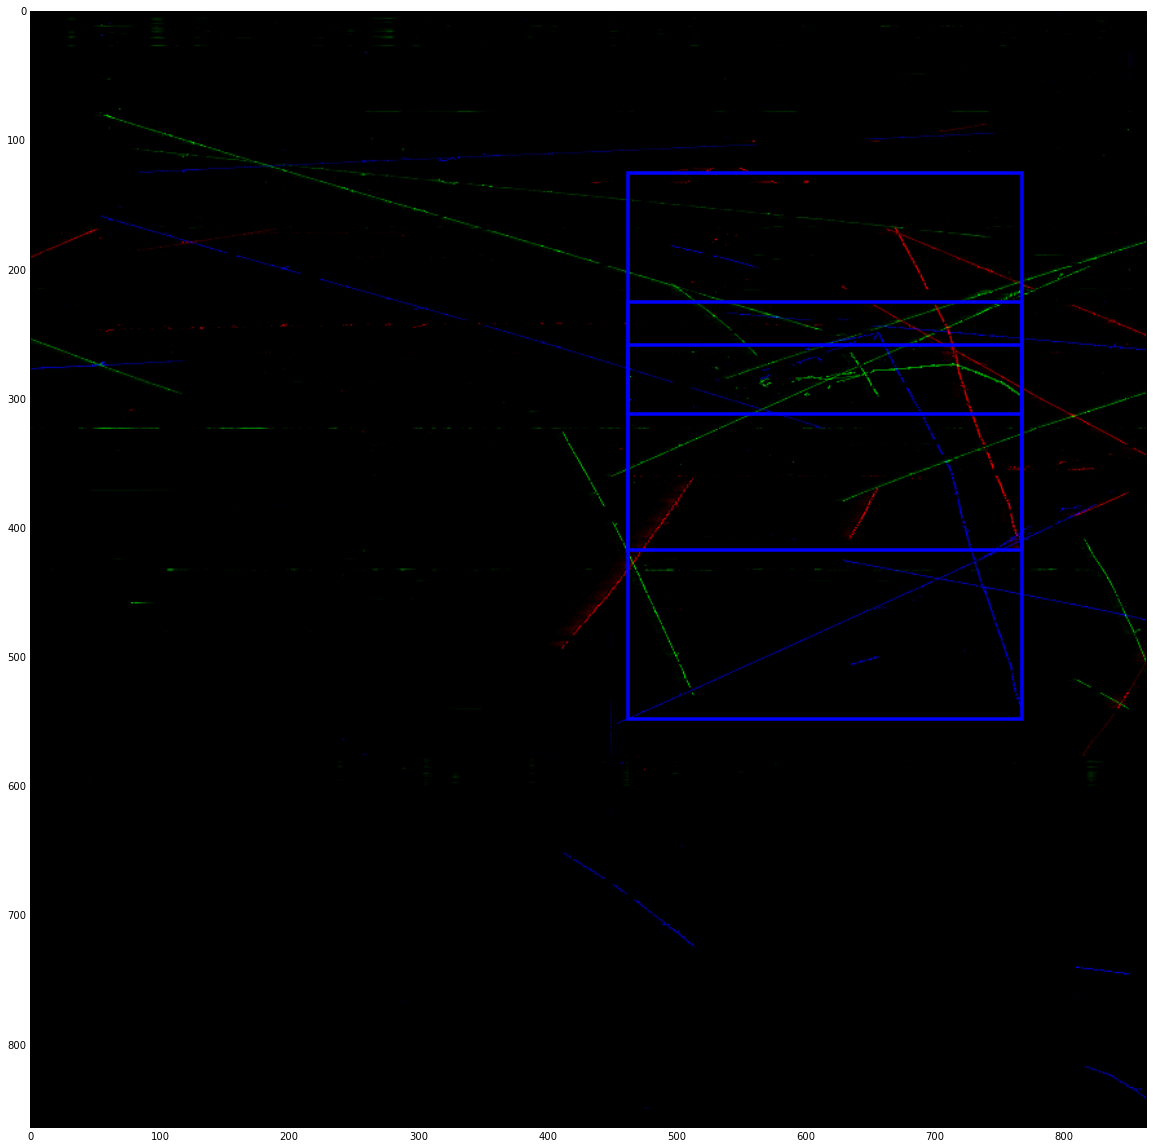

In [4]:
_sw.solver.step(1)
data = _sw.solver.net.blobs['data'].data
iminfo = _sw.solver.net.blobs['im_info'].data
gtboxes = _sw.solver.net.blobs['gt_boxes'].data
print data[0].transpose(2,1,0).shape
image = data[0].transpose(2,1,0).astype(np.uint8)

fig,ax = plt.subplots(figsize=(20,20))
plt.imshow(image)
a = [ gt for gt in gtboxes ]
for aa in a:
    ax.add_patch(plt.Rectangle( (aa[1],aa[0]),aa[3]-aa[1], aa[2]-aa[0],fill=False,edgecolor='blue',linewidth=3.5))
plt.show()

In [6]:
from fast_rcnn.bbox_transform import clip_boxes, bbox_transform_inv  

In [7]:
#_sw.solver.net.blobs['cls_score'].data[:,1]
#fig,ax = plt.subplots(figsize=(10,6))
#print _sw.solver.net.blobs['bbox_pred'].data[0]
print _sw.solver.net.blobs['loss_cls'].data
print _sw.solver.net.blobs['loss_bbox'].data

0.662722587585
0.398424476385


In [11]:
s1 = []
s2 = []

In [41]:
for i in xrange(1000):
    _sw.solver.step(1)
    scores = _sw.solver.net.blobs['cls_score'].data
    boxes = _sw.solver.net.blobs['rois'].data[:, 1:5]
    box_deltas = _sw.solver.net.blobs['bbox_pred'].data
    pred_boxes = bbox_transform_inv(boxes, box_deltas)  
    pred_boxes = clip_boxes(pred_boxes, (576,576))
    cls_ind = 0
    cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
    cls_scores = scores[:, cls_ind]
    dets = np.hstack((cls_boxes,
                     cls_scores[:, np.newaxis])).astype(np.float32) 
\
    s1.append(scores[0][0])
    s2.append(scores[0][1])



	>> randomly permitting training roidb
	>> randomly permitting training roidb
	>> randomly permitting training roidb
	>> randomly permitting training roidb
	>> randomly permitting training roidb


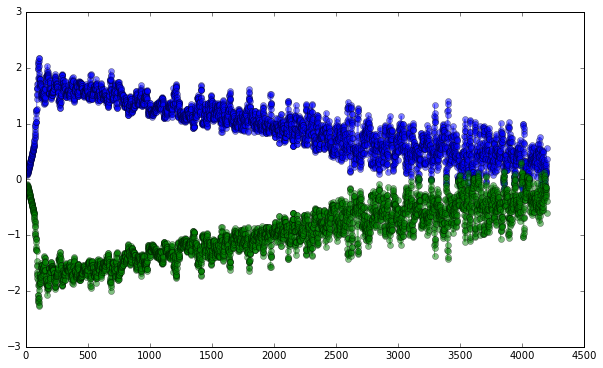

In [44]:
import pandas as pd
fig,ax = plt.subplots(figsize=(10,6))
ss1 = pd.Series(s1)
ss2 = pd.Series(s2)
ax.plot(np.arange(0,len(s1),1),ss1.rolling(window=10).mean(),'-o',alpha=0.5)
ax.plot(np.arange(0,len(s2),1),ss2.rolling(window=10).mean(),'-o',alpha=0.5)    
plt.show()

In [30]:
_sw.solver.net.blobs.keys()

['data',
 'im_info',
 'gt_boxes',
 'data_input-data_0_split_0',
 'data_input-data_0_split_1',
 'im_info_input-data_1_split_0',
 'im_info_input-data_1_split_1',
 'gt_boxes_input-data_2_split_0',
 'gt_boxes_input-data_2_split_1',
 'conv1',
 'norm1',
 'pool1',
 'conv2',
 'norm2',
 'pool2',
 'conv3',
 'conv4',
 'conv5',
 'conv5_relu5_0_split_0',
 'conv5_relu5_0_split_1',
 'rpn/output',
 'rpn/output_rpn_relu/3x3_0_split_0',
 'rpn/output_rpn_relu/3x3_0_split_1',
 'rpn_cls_score',
 'rpn_cls_score_rpn_cls_score_0_split_0',
 'rpn_cls_score_rpn_cls_score_0_split_1',
 'rpn_bbox_pred',
 'rpn_bbox_pred_rpn_bbox_pred_0_split_0',
 'rpn_bbox_pred_rpn_bbox_pred_0_split_1',
 'rpn_cls_score_reshape',
 'rpn_cls_score_reshape_rpn_cls_score_reshape_0_split_0',
 'rpn_cls_score_reshape_rpn_cls_score_reshape_0_split_1',
 'rpn_labels',
 'rpn_bbox_targets',
 'rpn_bbox_inside_weights',
 'rpn_bbox_outside_weights',
 'rpn_cls_loss',
 'rpn_loss_bbox',
 'rpn_cls_prob',
 'rpn_cls_prob_reshape',
 'rpn_rois',
 'rois',
 